In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

In [90]:
donations = pd.DataFrame.from_csv('opendata_donations.csv', index_col=None).ix[:,0:23]
donations = donations.rename(columns=lambda x: x.strip()) # removing whitespaces from columns
donations = donations[(donations.donor_zip!='SC')&(donations.donor_zip!='NY')&(donations.donor_zip!='NJ')&(donations.donor_zip!='TX')]
#donations = donations[(donations.donor_city!='" everything\"')&(donations.donor_city!='" inventor\"')&(donations.donor_city!='" Flight Recorders. The other plotting sister is learning to play recorder\"')]
#donations = donations.dropna()[donations.donor_state != 'ozone park'] 
donations.head(5)

,_donationid,_projectid,_donor_acctid,_cartid,donor_city,donor_state,donor_zip,is_teacher_acct,donation_timestamp,donation_to_project,...,donation_included_optional_support,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,thank_you_packet_mailed,donation_message
0,00000ce845c00cbf0686c992fc369df4,7be7184572a67468a2ef4402e7de6c99,01e2385f52c03386ee345c517be8f84e,NaN,NaN,NY,NaN,f,36:26.8,21.25,...,t,promo_code_match,f,f,f,f,f,f,f,Friends and Family matching donation provided ...
1,0000174d1d38072889d47e51b587a10c,fbef21e4fdf303eebe6c48b99ef9de8f,f495e99822acc50e934a57943400bcfe,db07e0db53dfa402c4a2aa02d46583d4,San Francisco,CA,941,f,07:26.1,1817.36,...,t,no_cash_received,t,f,f,f,t,f,f,Chevron is committed to securing California’s ...
2,0000219e4b37d2504fb6b8c28e24a2d4,b4afbc05ce9ff8420c176810bd59db79,d63c0d8e5b76530d476486e3336e1f3c,9bd9e83716ecd6bee6e467e9b82964ab,Ballwin,MO,630,f,29:59.3,40.43,...,t,paypal,f,f,f,f,f,f,f,I donated because the project will bring impor...
3,0000300773fe015f870914b42528541b,f8fac919961560831eac7e5dd05c872d,e0dd67c660dc50ec1b2dadf37f3c65d4,NaN,NaN,NY,100,f,54:57.7,21.25,...,t,promo_code_match,f,f,f,f,t,f,f,Courtesy of an anonymous donor. Best of luck w...
4,000048290a3054197cc33ba82633d7c3,de2f3691169dd3439ee37a78b49296e7,f00a2c100229d370655841ed8341baed,49e3f476b31da5bcd1d077e2c491d1b3,NaN,TN,373,t,58:11.7,0.88,...,t,no_cash_received,t,f,f,f,t,f,f,Good Luck! :)


Mean and Variance: 76.9942709157 82093.7525665


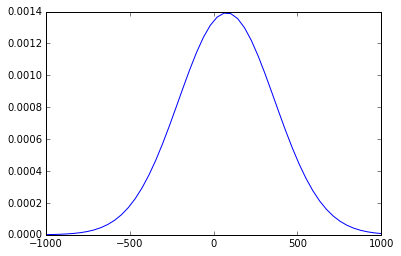

In [85]:
# Checking if Donation amounts form a normal distribution
mean = donations['donation_total'].mean()
variance = donations['donation_total'].var()
print 'Mean and Variance:',mean,variance
sigma = math.sqrt(variance)
x = np.linspace(-1000,1000)
plt.plot(x,mlab.normpdf(x,mean,sigma))
plt.show()

*Donation amount does have a normal distribution*

### 1) How does state where donor resides affect the donation amount ?

In [93]:
# 1) Plot between Donation State and Donation Amount
d = donations
# Removing states that have less than 100 donations
d = d[(d.donor_state != 'ozone park')&(d.donor_state != 'AA') & (d.donor_state != 'AS') & (d.donor_state != 'GU') & (d.donor_state !='MP') & (d.donor_state !='PR') & (d.donor_state != 'VI') & (d.donor_state != 'AP')]
d.loc[:,'donor_state']
d = d.groupby(by='donor_state')

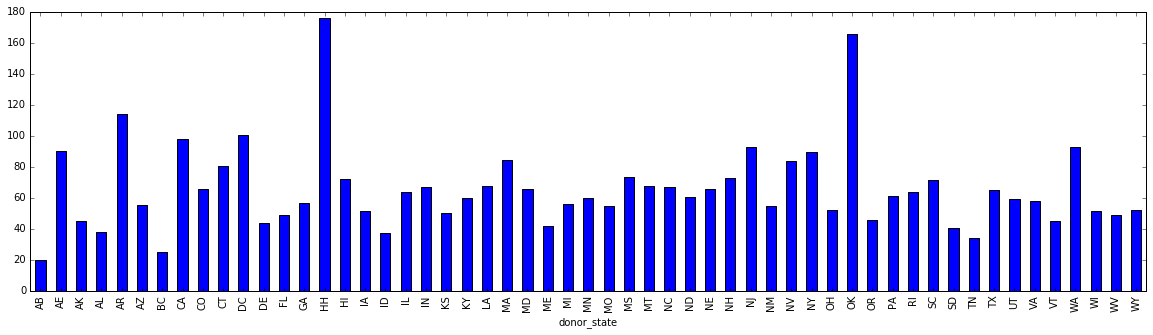

In [94]:
d_mean = d['donation_total'].mean()
d_mean.plot(kind='bar',figsize=(20,5))

### 2) Who donates the most - teacher or non-teacher ?

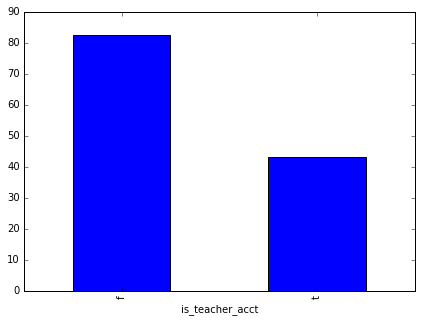

In [95]:
#2) Plot between IsTeacher and Donation Amount
d = donations.groupby(by='is_teacher_acct')
d_mean = d['donation_total'].mean()
d_mean.plot(kind='bar',figsize=(7,5))

** Teachers donate way less compared to others **

In [96]:
d['donation_total'].count()

is_teacher_acct
f    893801
t    150890
Name: donation_total, dtype: int64

### 3) How does payment type vary with donation amount ?

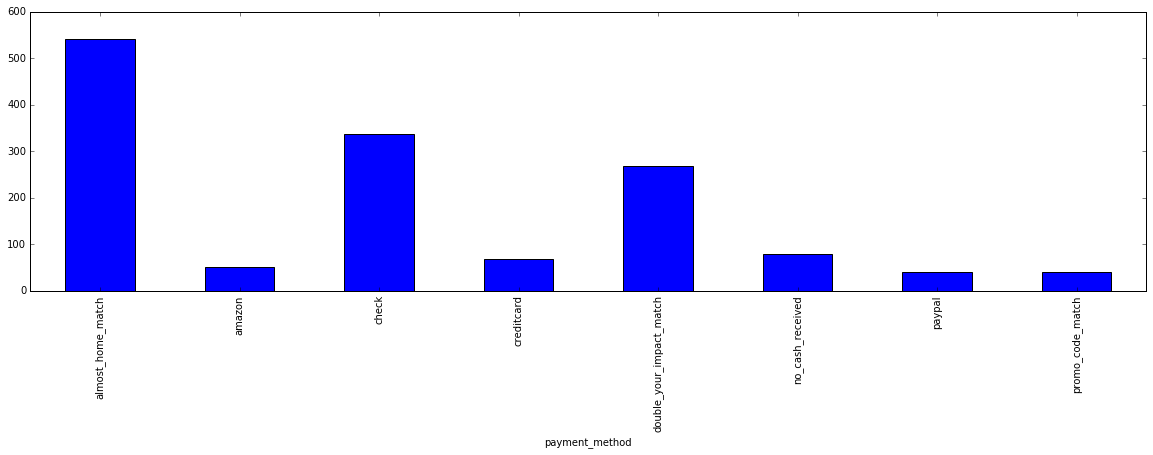

In [97]:
#3) Plot between payment type and Donation Amount
d = donations.groupby(by='payment_method')
d_mean = d['donation_total'].mean()
d_mean.plot(kind='bar',figsize=(20,5))

### 4) How does donation type vary with donation amount ?

In [102]:
#4) Plot between Donation type and Donation amount
d = donations
d1 = d[d.for_honoree == 't']['donation_total']
d2 = d[d.via_giving_page == 't']['donation_total']
d3 = d[(d.for_honoree == 'f') & (d.via_giving_page == 'f')]['donation_total']
print d1.count(),d2.count(),d3.count()
print 'Average Donation amount if Honoree is included:',d1.mean()
print 'Average Donation amount via Giving page:',d2.mean()
print 'Average Donation amount for not in the category:',d3.mean()

27429 422273 600469
Average Donation amount if Honoree is included: 77.5748824237
Average Donation amount via Giving page: 80.866552633
Average Donation amount for not in the category: 74.6943260518


**It is found that people on an average donate more via a referral/friend's giving page than on their own **